In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('SaYoPillow.csv')

In [ ]:
train.shape

(630, 9)

In [4]:
train

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [6]:
# sr - snoringe range, rr - respiration rate, t - body temperature, lm - limb movement rate, bo - blood oxgyen,rem - eye movement,sr.1 - number of hours sleep,hr - heart rate, sl - 0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high

In [11]:
train.rename(columns={"sr": "Snoringe Range", "rr" : "Respiration Rate", "t" : "Body Temperature", 'lm' : "Limb Movment Rate", "bo" : "Blood Oxgyen", "rem" : "Eye Movement", "sr.1" : "Number Of Hours Sleep", "hr": "Heart Rate", "sl": "Stress Level"}, inplace=True)

In [12]:
train

,Snoringe range,respiration rate,Body Temperature,Limb Movment Rate,Blood Oxgyen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [56]:
train['Snoringe range'].unique()

array([ 93.8  ,  91.64 ,  60.   ,  85.76 ,  48.12 ,  56.88 ,  47.   ,
        50.   ,  45.28 ,  55.52 ,  73.44 ,  59.28 ,  48.6  ,  96.288,
        87.8  ,  52.32 ,  52.64 ,  86.24 ,  81.56 ,  63.68 ,  77.6  ,
        77.28 ,  69.76 ,  88.04 ,  89.96 ,  53.68 ,  78.56 ,  50.96 ,
        94.76 ,  62.08 ,  49.12 ,  96.256,  47.68 ,  99.904,  86.72 ,
        48.48 ,  98.528,  46.12 ,  98.72 ,  60.96 ,  65.6  ,  75.36 ,
        49.28 ,  73.28 ,  98.912,  62.88 ,  97.664,  56.72 ,  96.576,
        49.6  ,  53.6  ,  93.2  ,  46.84 ,  56.08 ,  75.68 ,  97.536,
        92.84 ,  87.56 ,  58.48 ,  98.336,  81.08 ,  46.6  ,  61.6  ,
        96.448,  50.24 ,  49.92 ,  60.48 ,  99.136,  48.28 ,  50.48 ,
        96.192,  57.68 ,  45.16 ,  48.68 ,  98.016,  96.8  ,  56.48 ,
        90.08 ,  96.   ,  50.64 ,  50.56 ,  53.92 ,  96.672,  68.32 ,
        54.88 ,  52.4  ,  51.6  ,  92.48 ,  98.24 ,  65.12 ,  86.6  ,
        68.   ,  99.808,  45.2  ,  63.2  ,  98.272,  75.2  ,  76.96 ,
        80.   ,  99.

In [57]:
train['Heart Rate'].unique()

array([74.2 , 72.76, 60.  , 68.84, 53.12, 58.44, 52.  , 55.  , 50.28,
       57.76, 63.36, 59.64, 53.6 , 75.72, 70.2 , 56.16, 56.32, 69.16,
       66.04, 60.92, 64.4 , 64.32, 62.44, 70.36, 71.64, 56.84, 64.64,
       55.48, 74.84, 60.52, 54.12, 75.64, 52.68, 84.76, 69.48, 53.48,
       81.32, 51.12, 81.8 , 60.24, 61.4 , 63.84, 54.28, 63.32, 82.28,
       60.72, 79.16, 58.36, 76.44, 54.6 , 56.8 , 73.8 , 51.84, 58.04,
       63.92, 78.84, 73.56, 70.04, 59.24, 80.84, 65.72, 51.6 , 60.4 ,
       76.12, 55.12, 54.92, 60.12, 82.84, 53.28, 55.24, 75.48, 58.84,
       50.16, 53.68, 80.04, 77.  , 58.24, 71.72, 75.  , 55.32, 55.28,
       56.96, 76.68, 62.08, 57.44, 56.2 , 55.8 , 73.32, 80.6 , 61.28,
       69.4 , 62.  , 84.52, 50.2 , 60.8 , 80.68, 63.8 , 64.24, 65.  ,
       84.04, 78.04, 50.04, 78.44, 56.76, 60.36, 60.56, 64.8 , 77.4 ,
       57.2 , 62.24, 76.52, 52.44, 72.04, 61.72, 79.8 , 62.16, 64.  ,
       54.52, 57.48, 57.64, 71.88, 78.28, 59.04, 67.4 , 80.28, 80.52,
       61.44, 58.6 ,

In [58]:
train['Blood Oxgyen'].unique()

array([89.84 , 89.552, 95.   , 88.768, 96.248, 94.064, 95.8  , 97.   ,
       95.112, 93.656, 91.344, 94.784, 96.44 , 82.432, 89.04 , 92.696,
       92.792, 88.832, 88.208, 90.368, 91.76 , 91.728, 90.976, 89.072,
       89.328, 93.104, 91.856, 92.288, 89.968, 90.208, 96.648, 82.384,
       96.072, 87.856, 90.   , 88.896, 96.392, 85.792, 95.448, 86.08 ,
       90.096, 90.56 , 91.536, 96.712, 91.328, 86.368, 90.288, 84.496,
       94.016, 82.864, 96.84 , 93.08 , 89.76 , 95.736, 93.824, 91.568,
       84.304, 89.712, 89.008, 94.544, 85.504, 88.144, 95.64 , 90.16 ,
       82.672, 92.072, 96.968, 90.048, 86.704, 96.312, 92.144, 82.288,
       94.304, 95.064, 96.472, 85.024, 83.2  , 93.944, 89.344, 82.   ,
       92.192, 92.168, 93.176, 83.008, 90.832, 93.464, 92.72 , 92.48 ,
       89.664, 85.36 , 90.512, 88.88 , 90.8  , 87.712, 95.08 , 90.32 ,
       85.408, 91.52 , 91.696, 88.   , 87.424, 83.824, 95.016, 84.064,
       93.056, 90.144, 90.224, 91.92 , 83.44 , 93.32 , 90.896, 82.912,
      

In [14]:
train['Stress Level'].unique()

array([3, 1, 0, 2, 4], dtype=int64)

In [ ]:
train['Stress Level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: Stress Level, dtype: int64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Snoringe range         630 non-null    float64
 1   respiration rate       630 non-null    float64
 2   Body Temperature       630 non-null    float64
 3   Limb Movment Rate      630 non-null    float64
 4   Blood Oxgyen           630 non-null    float64
 5   Eye Movement           630 non-null    float64
 6   Number Of Hours Sleep  630 non-null    float64
 7   Heart Rate             630 non-null    float64
 8   Stress Level           630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


UNIVARIATE ANALYSIS

**NUMERICAL DATA ANALYSIS**

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\1378587863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Body Temperature"])


-0.2857511600166689

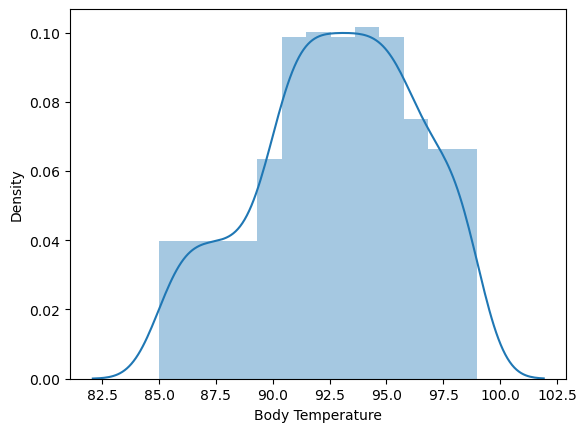

In [47]:
sns.distplot(train["Body Temperature"])
train['Body Temperature'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\2987789043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Limb Movment Rate"])


0.16266707843026826

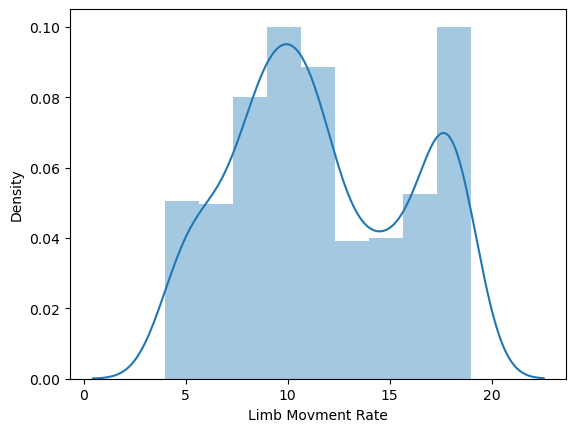

In [48]:
sns.distplot(train["Limb Movment Rate"])
train['Limb Movment Rate'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\1651384083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Blood Oxgyen"])


-0.3606553282300263

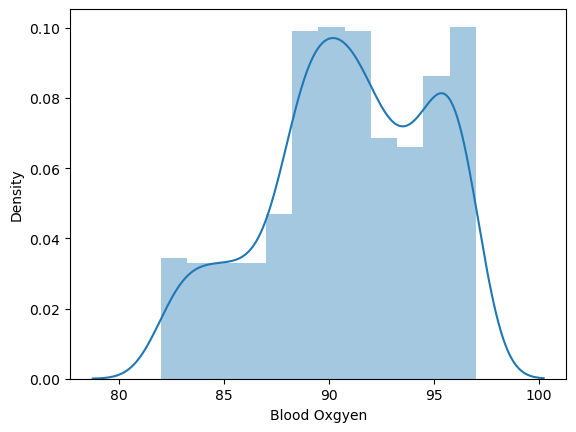

In [49]:
sns.distplot(train["Blood Oxgyen"])
train['Blood Oxgyen'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\1126066828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Eye Movement"])


-0.5738786598112939

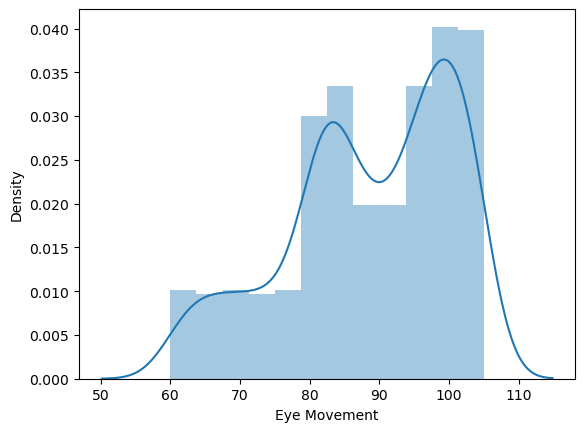

In [50]:
sns.distplot(train["Eye Movement"])
train['Eye Movement'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\3804887666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Number Of Hours Sleep"])


0.17511258649719963

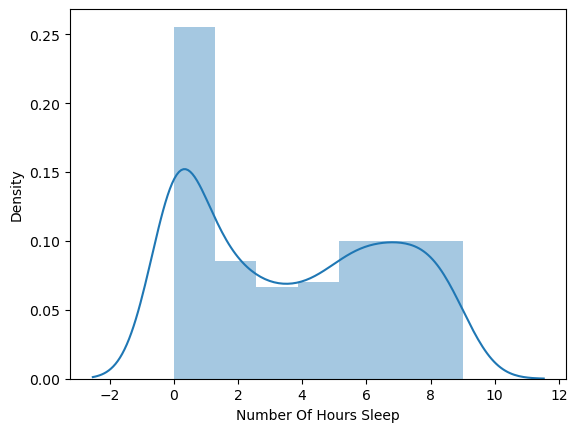

In [51]:
sns.distplot(train["Number Of Hours Sleep"])
train['Number Of Hours Sleep'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\1959881697.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Heart Rate"])


0.4558625471984541

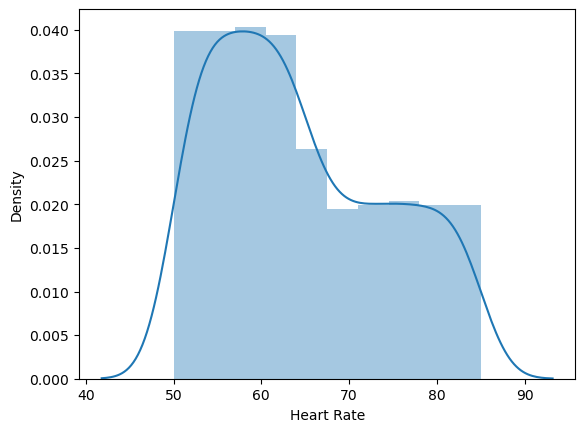

In [52]:
sns.distplot(train["Heart Rate"])
train['Heart Rate'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\467788349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Snoringe range"])


0.11393461423002128

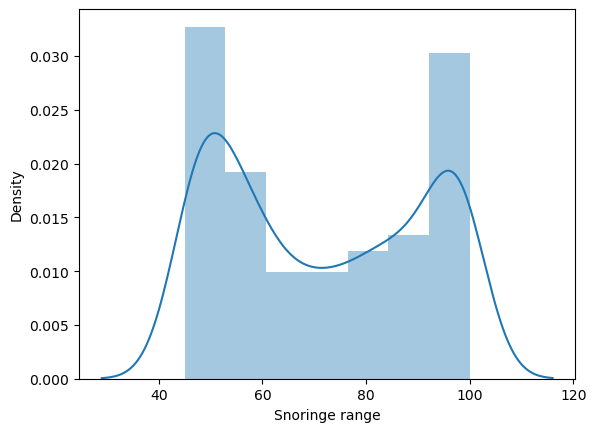

In [53]:
sns.distplot(train["Snoringe range"])
train['Snoringe range'].skew()

C:\Users\IT Support\AppData\Local\Temp\ipykernel_25736\2753615147.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['respiration rate'])


0.45586254719845326

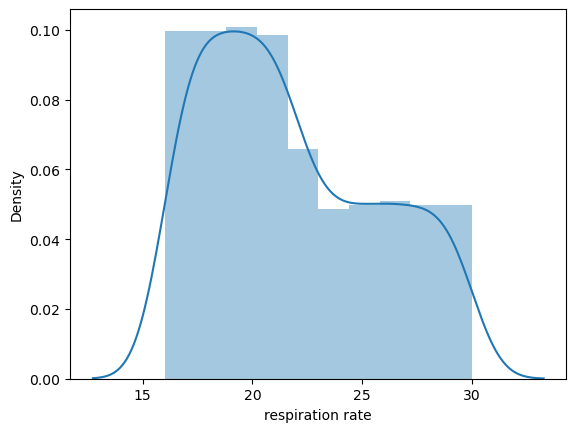

In [54]:
sns.distplot(train['respiration rate'])
train['respiration rate'].skew()

In [ ]:
train[train['Stress Level']==1].shape

(126, 9)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Snoringe range         630 non-null    float64
 1   respiration rate       630 non-null    float64
 2   Body Temperature       630 non-null    float64
 3   Limb Movment Rate      630 non-null    float64
 4   Blood Oxgyen           630 non-null    float64
 5   Eye Movement           630 non-null    float64
 6   Number Of Hours Sleep  630 non-null    float64
 7   Heart Rate             630 non-null    float64
 8   Stress Level           630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [28]:
train.head()

,Snoringe range,respiration rate,Body Temperature,Limb Movment Rate,Blood Oxgyen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


<Axes: xlabel='Stress Level', ylabel='Blood Oxgyen'>

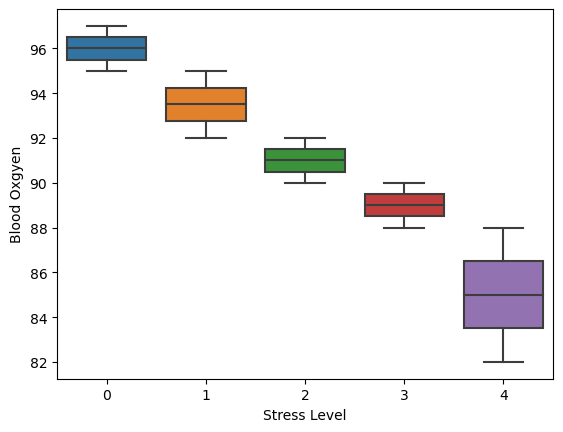

In [29]:
sns.boxplot(x='Stress Level', y='Blood Oxgyen', data=train)

<Axes: xlabel='Stress Level', ylabel='Heart Rate'>

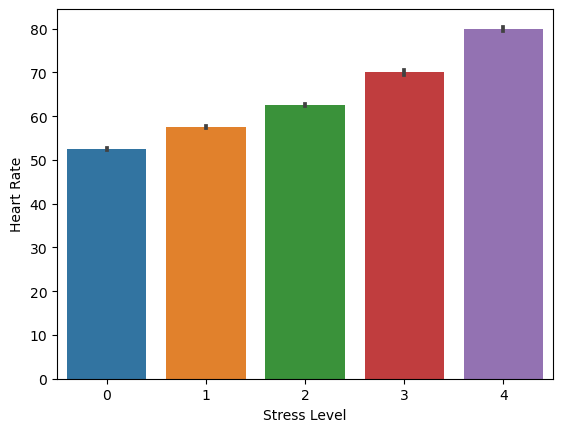

In [30]:
sns.barplot(x='Stress Level',y='Heart Rate',data=train)

In [31]:
train.head()

,Snoringe range,respiration rate,Body Temperature,Limb Movment Rate,Blood Oxgyen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [32]:
train.head()

,Snoringe range,respiration rate,Body Temperature,Limb Movment Rate,Blood Oxgyen,Eye Movement,Number Of Hours Sleep,Heart Rate,Stress Level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [33]:
X = train.drop(['Stress Level'], axis=1).values

y = train['Stress Level'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(441, 8)
(189, 8)


In [36]:
X

array([[ 93.8  ,  25.68 ,  91.84 , ...,  99.6  ,   1.84 ,  74.2  ],
       [ 91.64 ,  25.104,  91.552, ...,  98.88 ,   1.552,  72.76 ],
       [ 60.   ,  20.   ,  96.   , ...,  85.   ,   7.   ,  60.   ],
       ...,
       [ 97.504,  27.504,  86.88 , ..., 101.88 ,   0.   ,  78.76 ],
       [ 58.64 ,  19.728,  95.728, ...,  84.32 ,   6.728,  59.32 ],
       [ 73.92 ,  21.392,  93.392, ...,  91.96 ,   4.088,  63.48 ]])

In [35]:
X_train

array([[ 88.28 ,  24.208,  91.104, ...,  97.76 ,   1.104,  70.52 ],
       [ 45.72 ,  16.288,  96.432, ...,  62.88 ,   7.288,  50.72 ],
       [ 88.04 ,  24.144,  91.072, ...,  97.68 ,   1.072,  70.36 ],
       ...,
       [ 96.128,  26.128,  85.16 , ..., 100.16 ,   0.   ,  75.32 ],
       [ 92.36 ,  25.296,  91.648, ...,  99.12 ,   1.648,  73.24 ],
       [ 61.92 ,  20.192,  92.192, ...,  85.96 ,   2.288,  60.48 ]])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
rfc = RandomForestClassifier(n_estimators=60, random_state=23)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=60, random_state=23)

In [40]:
rfc.score(X_train,y_train)

1.0

In [41]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test )
accuracy_score(y_pred,y_test) 

0.9788359788359788

In [42]:
import sklearn.metrics

In [43]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      0.97      0.97        36
           2       0.97      0.97      0.97        31
           3       1.00      0.95      0.97        40
           4       0.97      1.00      0.99        39

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



In [44]:
y_pred = rfc.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[43,  0,  0,  0,  0],
       [ 1, 35,  0,  0,  0],
       [ 0,  1, 30,  0,  0],
       [ 0,  0,  1, 38,  1],
       [ 0,  0,  0,  0, 39]], dtype=int64)

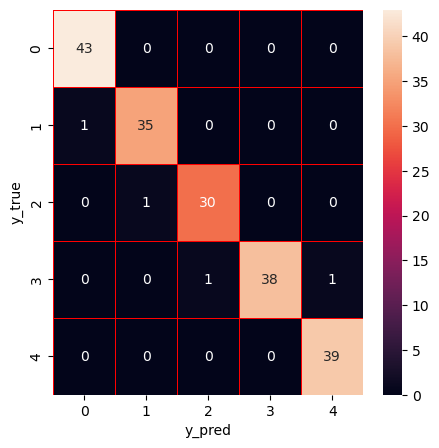

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
import pickle

pickle.dump(rfc,open('stress.pkl','wb'))
stress = pickle.load(open('stress.pkl','rb'))